In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning /KNN/auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Data Cleaning

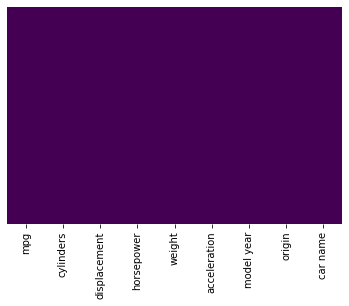

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()
#No missing variables

In [5]:
print(len(df.horsepower))
#df['horsepower'] = np.where(df['horsepower']=='?', 'green', 'red')
df1 = df[df.horsepower != "?"]
print(len(df1.horsepower))

398
392


In [6]:
#Converting Columns to Numeric
df1.loc[:,'horsepower'] = df1.loc[:,'horsepower'].astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Imputing "?" in horsepower based on Cylinders

In [7]:
#Imputing "?" in horsepower based on Cylinders
means = df1.groupby('cylinders').mean()
means

,mpg,displacement,horsepower,weight,acceleration,model year,origin
cylinders,,,,,,,
3,20.550000,72.500000,99.250000,2398.500000,13.250000,75.500000,3.000000
4,29.283920,109.670854,78.281407,2305.110553,16.581910,77.030151,2.000000
5,27.366667,145.000000,82.333333,3103.333333,18.633333,79.000000,2.000000
6,19.973494,218.361446,101.506024,3202.120482,16.254217,75.951807,1.192771
8,14.963107,345.009709,158.300971,4114.718447,12.955340,73.902913,1.000000


In [8]:
m3 = means['horsepower'][3]
m3

99.25

In [9]:
#Mean of Horsepower
m3 = means['horsepower'][3]
m4 = means['horsepower'][4]
m5 = means['horsepower'][5]
m6 = means['horsepower'][6]
m8 = means['horsepower'][8]

df.loc[(df['cylinders'] == 3) & (df['horsepower']=="?"), 'horsepower'] = m3
df.loc[(df['cylinders'] == 4) & (df['horsepower']=="?"), 'horsepower'] = m4
df.loc[(df['cylinders'] == 5) & (df['horsepower']=="?"), 'horsepower'] = m5
df.loc[(df['cylinders'] == 6) & (df['horsepower']=="?"), 'horsepower'] = m6
df.loc[(df['cylinders'] == 8) & (df['horsepower']=="?"), 'horsepower']  = m8

In [10]:
#Converting Columns to Numeric for df
#df.column_name = df.column_name.astype(np.int64)
df['horsepower'] = df['horsepower'].astype(int)



In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


In [12]:
  #Creating a target variable
  mean_mpg = df['mpg'].mean()
  df['mpg_level'] = np.where(df['mpg'] > mean_mpg, 1, 0)
  df = df.drop(['mpg', 'car name'], axis='columns')

In [13]:
# Prepare the dataset
def load_dataset(df):
  # split into inputs and outputs
  last_ix = len(df.columns) - 1
  X, y = df.drop(df.columns[last_ix], axis=1), df[df.columns[last_ix]]
  # label encode the target variable to have the classes 0 and 1
  y = LabelEncoder().fit_transform(y)
  return X, y

In [14]:
# load the dataset
X, y= load_dataset(df)
X.head()


,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1


In [15]:
#Scaling variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
scaler.fit(X.drop(['cylinders','origin','model year'], axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
scaled_features = scaler.transform(X.drop(['cylinders','origin','model year'], axis=1))
df1 = pd.DataFrame(scaled_features, columns= ['displacement','horsepower', 'weight', 'acceleration'])
df1.head()
len(df1)

398

In [18]:
#One hot encoding for categorical variables
df2 = pd.get_dummies(X, columns = ['cylinders','origin','model year' ], drop_first = False)
df3 = df2.drop(['displacement','horsepower','weight','acceleration'], axis=1)
df3.head()
len(df3)

398

In [19]:
newdf =pd.concat([df1,df3], axis=1, join="inner")
newdf.head()

,displacement,horsepower,weight,acceleration,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3,model year_70,model year_71,model year_72,model year_73,model year_74,model year_75,model year_76,model year_77,model year_78,model year_79,model year_80,model year_81,model year_82
0,1.090604,0.676119,0.630870,-1.295498,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1.503514,1.590788,0.854333,-1.477038,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1.196232,1.198787,0.550470,-1.658577,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1.061796,1.198787,0.546923,-1.295498,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1.042591,0.937453,0.565841,-1.840117,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
len(newdf)

398

In [22]:
X_train, X_test, y_train, y_test = train_test_split(newdf, df['mpg_level'], test_size=0.20)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
# I randomly chose the n_neighbors as 5

In [24]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [25]:
pred = knn.predict(X_test)

Prediction and Evaluation

In [26]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

In [27]:
cm=confusion_matrix(y_test, pred)

In [28]:
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['Class 1', 'Class 0'])

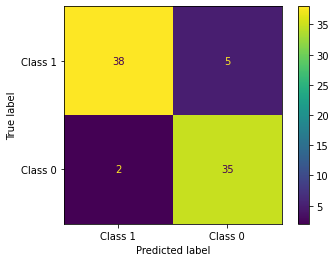

In [29]:
cmd_obj.plot()

In [30]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92        43
           1       0.88      0.95      0.91        37

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.92      0.91      0.91        80



Choosing the best K-Value

In [31]:
error_rate = {}
errors =[]

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    e_rate = np.mean(pred_i != y_test)
    error_rate[i]= e_rate

mini=1000
for key, val in error_rate.items():
  errors.append(val)
  if val< mini:
    mini=val

index = min(error_rate, key=error_rate.get)
print("index:", index)
print("minimum value:",mini)

index: 1
minimum value: 0.05


Text(0, 0.5, 'Error Rate')

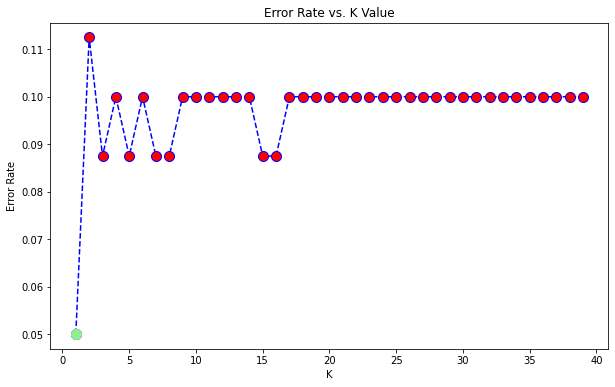

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errors, color="blue",markerfacecolor='red', linestyle='dashed', marker='o', markersize=10)
plt.plot(index,mini,color="lightgreen",marker='o', markersize=10) 
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

New Model with K=32

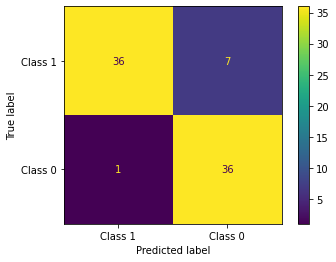

In [33]:
knn = KNeighborsClassifier(n_neighbors=32)

knn.fit(X_train,y_train)
pred2 = knn.predict(X_test)

cm=confusion_matrix(y_test, pred2)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['Class 1', 'Class 0'])
cmd_obj.plot()

In [34]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90        43
           1       0.84      0.97      0.90        37

    accuracy                           0.90        80
   macro avg       0.91      0.91      0.90        80
weighted avg       0.91      0.90      0.90        80

